## Lesson-02 Data Scientific Programming Intro

#### In this course you will learn
+ Wordcloud
+ GraphVisulization
+ Data Clean
+ Regular Expression
+ K-means

#### Wordcloud

In [12]:
    #!pip install wordcloud

#### 从第一课的练习开始

In [13]:
import jieba
import numpy as np
from jieba import posseg
from collections import defaultdict


def cut(string):
    return list(jieba.cut(string))


def idf(word):
    eps = 1e-6
    
    return 1 / (np.log10(sum(1 for s in sentences if word in s)) + eps)


def tf(word, sentence_cut):
    return sentence_cut.count(word)


def tfidf(word, sentence):
    return tf(word, sentence) * idf(word)


def get_tfidf_from_sentence(sentence_cut):
    ## you code here
    '''
    return : a dictionary
    '''
    
    tf_idf_words = dict()
    
    for c in set(sentence_cut):
        tf_idf_words[c] = tfidf(c, sentence_cut)
        
    return tf_idf_words


def get_top_tfidf(sentence_cut, ratio=0.25):
    """
    return : [(word1, tfidf_value), (word2, tfidf_value)]
    """
    tfidf_value = get_tfidf_from_sentence(sentence_cut)
    
    top_ratio = ratio
    
    return sorted(tfidf_value.items(), key=lambda x: x[1], reverse=True)[:int(len(tfidf_value)*top_ratio)]


def is_name(cut_word):
    w, _type = list(posseg.cut(cut_word))[0]
    
    if _type == 'nr': return True
    
    return False


# def get_names_from_sentence(sentence: str):
#     names = []
    
#     for w_t in posseg.cut(cut_word):
#         w, t = tuple(w_t)
        
#         if t ++ 
#     return [w for w in cut_sentence if is_name(w)]


# we do some refractor
def get_name_correlate(sentence: str):
    
    name_correlate = defaultdict(lambda : defaultdict(int))
    
    names = []
    
    for w_t in posseg.cut(sentence):
        w, t = tuple(w_t)
        
        if t == 'nr': names.append(w)
            
    for n in names:
        for w in names:
            if n == w: continue
                
            name_correlate[n][w] += 1 
    
    return name_correlate

In [14]:
content = open('dataset/article_9k.txt', encoding='utf-8')
CHARACTERS = content.read()

In [15]:
sentences = CHARACTERS.split('\n')
all_sentences_with_cut_tokens = []

In [16]:
%%time
all_sentences_with_cut_tokens = [cut(s) for s in sentences]

Wall time: 3min 7s


In [17]:
sample_news = get_top_tfidf(all_sentences_with_cut_tokens[99])

In [18]:
from wordcloud import WordCloud

In [19]:
wc = WordCloud(background_color="white", max_words=1000)

In [20]:
wc.generate_from_frequencies?

Signature: wc.generate_from_frequencies(frequencies, max_font_size=None)
Docstring:
Create a word_cloud from words and frequencies.

Parameters
----------
frequencies : dict from string to float
    A contains words and associated frequency.

max_font_size : int
    Use this font-size instead of self.max_font_size

Returns
-------
self
File:      c:\users\geesi\anaconda3\lib\site-packages\wordcloud\wordcloud.py
Type:      method


In [21]:
wc.generate_from_frequencies({w: v for w, v in sample_news})

In [22]:
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

In [24]:
wc.generate_from_frequencies({w: v for w, v in sample_news})

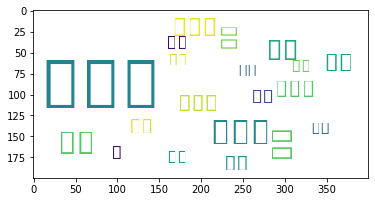

In [25]:
plt.imshow(wc)

In [26]:
wc = WordCloud(background_color="white", max_words=1000, font_path='fonts/SimHei.ttf')

In [27]:
wc.generate_from_frequencies({w: v for w, v in sample_news})

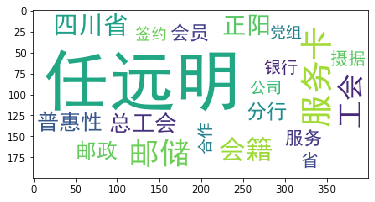

In [28]:
plt.imshow(wc)

In [29]:
def generate_word_cloud_by_article(string):
    wc = WordCloud(background_color="black", max_words=1000, font_path='fonts/SimHei.ttf')
    words_importances = get_top_tfidf(cut(string), ratio=1.)
    
    wc.generate_from_frequencies({w: v for w, v in words_importances})
    
    plt.imshow(wc)

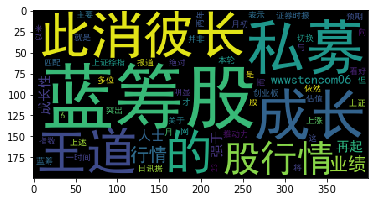

In [30]:
generate_word_cloud_by_article(sentences[10])

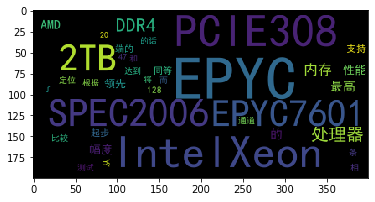

In [31]:
generate_word_cloud_by_article(sentences[50])

In [32]:
test_news = """
（原标题：中信电子评美国芯片限制升级：华为已有所准备 长期利好国内半导体板块发展）

美国限制升级，从华为供应端到海思芯片端。

2020年5月15日，美国商务部发布公告，计划限制华为使用美国技术和软件在美国境外设计和制造半导体的能力。具体来说，华为及其被列入实体名单中的分支机构，基于管制清单中的美国软件及技术生产的直接产品，与使用美国境外的管制清单中半导体设备所生产的基于华为设计规范的直接产品，在向华为及分支机构出货时，都需要申请许可证，相当于是对2019年5月17日将华为纳入实体名单的进一步升级。

但是同时也看到，本次公告只是计划而非正式条例出台，同时条例生效后上游供应商仍有120天的缓冲期。与此同时，美国商务部还宣布将华为的临时许可证再延长90天，推迟至2020年8月13日。美方2019年5月21日针对华为发放第一次临时许可证，截至本次已是第5次延长临时许可证，借助临时许可证，华为可从美国进口特定产品和技术。此外，据路透社报道，本次可能是最后一次延长许可证，同样属于对华为制裁的进一步升级。此外，此前华为的美国供应商也可通过证明产品无关国家安全，申请豁免继续供货，不受临时许可时效约束。

我们认为，过去一年华为在IC设计端已基本实现自研替代或非美供应商切换，而制造端华为仍高度依赖台积电，且上游半导体设备、EDA软件仍被美国厂商垄断，因而成为美方重点施压方向。目前华为已实现大量芯片自研，但制造环节仍然高度依赖台积电，是其产业链中的主要瓶颈。一旦制造环节无法在台积电下单，而中芯国际技术和产能爬坡仍需一定时间，则其大量自研的芯片将无法实现量产和应用，因此成为本次美国制裁政策的切入点。此外，在半导体设备方面，目前美国厂商占据半导体设备市场约40%份额，其中在沉积、刻蚀、离子注入、CMP、清洗、检测等关键工艺方面，应用材料、泛林、科天等美国厂商具有领先工艺技术优势和稳定性，经过了长期量产检验，因此短期内难以替代；在EDA软件方面，目前IC设计的EDA工具仍基本由Cadence、Synopsys、Mentor三家美国公司垄断，短期难以完全替代。
"""

C:\Users\geesi\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


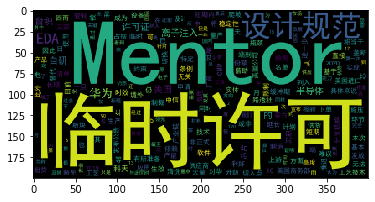

In [33]:
generate_word_cloud_by_article(test_news)

### For more information: https://github.com/amueller/word_cloud/tree/master/examples

## Topic2: Graph 

![](imgs/g_1.png)

![](imgs/g_2.jpg)

![](imgs/g_3.jpg)

In [34]:
#!pip install networkx

In [35]:
import networkx as nx

In [36]:
sentences[1000]

'在上周五刚刚结束的挑战的法则中由潘玮柏大张伟戚薇乔杉刘维于小彤组成的首发嘉宾阵容在经过第一期户外挑战和比拼之后迎来了他们首次舞台表演潘玮柏首发登场霸气演绎分裂的时光超完美表演惊艳全场当晚6位嘉宾纷纷放大招拿出自己最擅长的绝技为观众呈现了一场最完美的演出潘玮柏首发登场经典歌曲被遗忘的时光24个比利的全新改编演绎分裂的时光在原曲嘻哈流行的基础上加入弦乐伴奏与合唱团搭配瞬间气势磅礴充满张力尤其独有的潘氏低音炮一开嗓就引发全场尖叫苏到极致让人见识到什么是开口跪系列舞台上的潘玮柏霸气侧漏气场十足特别是高潮处呈现出的那种撕心裂肺的感觉仿佛能把人带到歌的故事里去这个改编跟原曲比起来节奏放缓了却在这缓慢抒情的演绎中又不缺乏爆发力像在对人们诉说着他的音乐他的追求超震撼演绎瞬间引发网友热议这个版本的24个比利太震撼了现场还是那么稳从头赞到尾的表演低音好撩人实力没得说不愧为初代偶像超级帅的现场很有感觉男神魅力依旧不减啊现场是真的稳'

In [37]:
get_name_correlate(sentences[1000])

defaultdict(<function __main__.get_name_correlate.<locals>.<lambda>()>,
            {'潘玮柏': defaultdict(int,
                         {'大张伟': 4,
                          '戚薇': 4,
                          '乔杉': 4,
                          '刘维': 4,
                          '张力': 4,
                          '潘氏': 4,
                          '高潮': 4}),
             '大张伟': defaultdict(int,
                         {'潘玮柏': 4,
                          '戚薇': 1,
                          '乔杉': 1,
                          '刘维': 1,
                          '张力': 1,
                          '潘氏': 1,
                          '高潮': 1}),
             '戚薇': defaultdict(int,
                         {'潘玮柏': 4,
                          '大张伟': 1,
                          '乔杉': 1,
                          '刘维': 1,
                          '张力': 1,
                          '潘氏': 1,
                          '高潮': 1}),
             '乔杉': defaultdict(int,
                         {'潘玮柏': 4,
 

In [38]:
from collections import defaultdict

In [39]:
simple_graph = defaultdict(list)

for k, d in get_name_correlate(sentences[1000]).items():
    simple_graph[k] = [name for name in d]

In [40]:
simple_graph

defaultdict(list,
            {'潘玮柏': ['大张伟', '戚薇', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '大张伟': ['潘玮柏', '戚薇', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '戚薇': ['潘玮柏', '大张伟', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '乔杉': ['潘玮柏', '大张伟', '戚薇', '刘维', '张力', '潘氏', '高潮'],
             '刘维': ['潘玮柏', '大张伟', '戚薇', '乔杉', '张力', '潘氏', '高潮'],
             '张力': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '潘氏', '高潮'],
             '潘氏': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '张力', '高潮'],
             '高潮': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '张力', '潘氏']})

In [41]:
simple_graph_vis = nx.Graph(simple_graph)

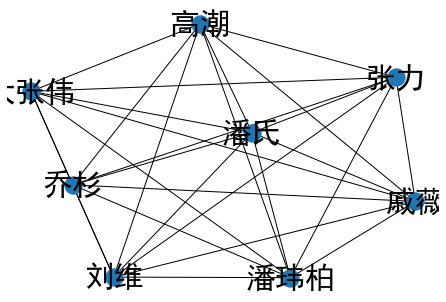

In [46]:
nx.draw(simple_graph_vis, with_labels=True, font_size=30, font_family="SimHei")

In [47]:
names_from_1k = get_name_correlate(sentences[1000])

In [48]:
graph_with_weight_vis = nx.Graph()

for k, d in names_from_1k.items():
    for name, value in d.items():
        #print(k, name, value)
        graph_with_weight_vis.add_weighted_edges_from([(k, name, value)])

In [49]:
pos = nx.spectral_layout(graph_with_weight_vis)

edges = []

for k, d in names_from_1k.items():
    for name, value in d.items():
        edges.append((k, name, value))

In [50]:
edges[:10]

[('潘玮柏', '大张伟', 4),
 ('潘玮柏', '戚薇', 4),
 ('潘玮柏', '乔杉', 4),
 ('潘玮柏', '刘维', 4),
 ('潘玮柏', '张力', 4),
 ('潘玮柏', '潘氏', 4),
 ('潘玮柏', '高潮', 4),
 ('大张伟', '潘玮柏', 4),
 ('大张伟', '戚薇', 1),
 ('大张伟', '乔杉', 1)]

In [51]:
all_weight = set(w for n1, n2, w in edges)

In [52]:
all_weight

{1, 4}

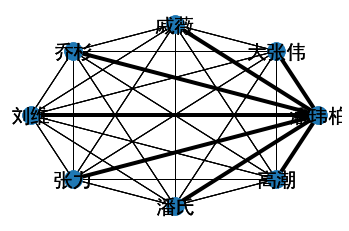

In [54]:
pos=nx.circular_layout(graph_with_weight_vis) 


for weight in all_weight:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in graph_with_weight_vis.edges(data=True) if edge_attr['weight']==weight]
    width = weight
    nx.draw_networkx_edges(graph_with_weight_vis,pos,edgelist=weighted_edges,width=width)
    nx.draw(graph_with_weight_vis, pos=pos, with_labels=True, font_size=20,font_family="SimHei")

In [130]:
plt.rcParams['figure.figsize'] = [18, 18]

def draw_people_connection_from_string(string):
    names_from_content = get_name_correlate(string)
    
    graph_with_weight_vis = nx.Graph()

    for k, d in names_from_content.items():
        for name, value in d.items():
        #print(k, name, value)
            graph_with_weight_vis.add_weighted_edges_from([(k, name, value)])
        
    pos=nx.circular_layout(graph_with_weight_vis) 

    for weight in all_weight:
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in graph_with_weight_vis.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(graph_with_weight_vis,pos,edgelist=weighted_edges,width=width)
        nx.draw(graph_with_weight_vis, pos=pos, with_labels=True, 
                font_size= 13, font_color='blue', font_family="SimHei", node_color='r', node_size=1000)
        
    return graph_with_weight_vis

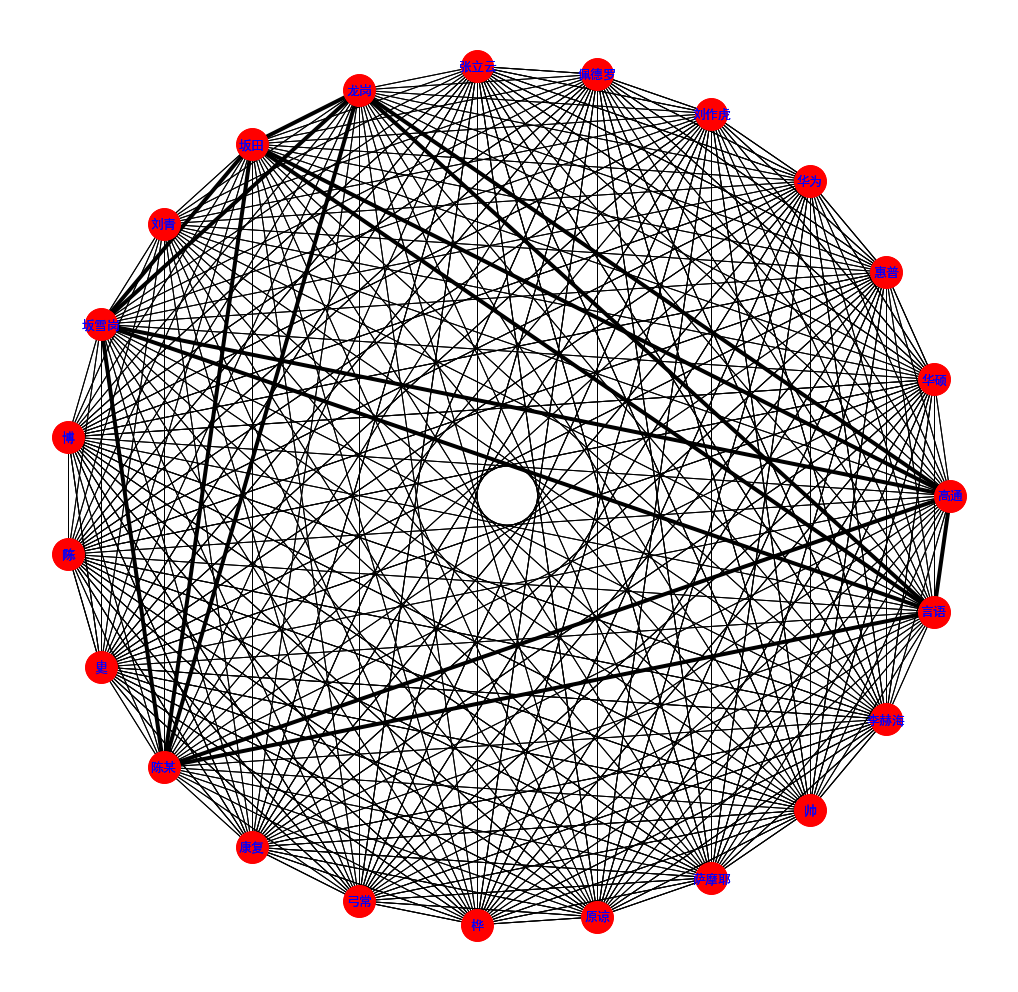

In [131]:
draw_people_connection_from_string(' '.join(sentences[:5]))

## 课后作业1： 应用搜索引擎，调整nextwork draw的方法和参数，使得产出能够良好可视化的图像

## K-means

## Remember we get the tfidf-vector from lessson-1

##### kmeans-visualize: https://www.youtube.com/watch?v=5I3Ei69I40s

![](imgs/k-means_result.gif)

![](imgs/k_means_2.png)

In [57]:
len(CHARACTERS)

33425826

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
import random

In [60]:
len(sentences)

89612

In [61]:
sample_sentences = random.sample(all_sentences_with_cut_tokens, k=1000)

In [62]:
sample_sentene_to_scikit = [
    ' '.join(s) for s in sample_sentences
]

In [65]:
vectorizer = TfidfVectorizer()

In [66]:
X = vectorizer.fit_transform(sample_sentene_to_scikit)

In [67]:
X.shape

(1000, 25913)

In [68]:
vectorizer = TfidfVectorizer(max_features=3000)

In [69]:
X = vectorizer.fit_transform(sample_sentene_to_scikit)

In [77]:
#vectorizer.vocabulary_

In [78]:
X.shape

(1000, 3000)

In [79]:
X[2].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [80]:
X[1].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [81]:
import numpy as np

In [83]:
np.where(X[1].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  25,   37,   39,   70,   74,  326,  362,  793, 1026, 1659, 1984,
        2065, 2534, 2683], dtype=int64))

In [84]:
id_to_word = {_id: word for word, _id in vectorizer.vocabulary_.items()}

In [88]:
from sklearn.cluster import KMeans

In [89]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [91]:
from sklearn.manifold import TSNE

In [92]:
X_embedded = TSNE(n_components=2).fit_transform(X.toarray())

In [93]:
X_embedded.shape

(1000, 2)

In [94]:
X_embedded[0]

array([-70.09862 , -17.920048], dtype=float32)

In [96]:
test_array = np.array([
    [1, 2], 
    [3, 4],
    [5, 6]
])

In [97]:
test_array[:, 0]

array([1, 3, 5])

In [98]:
test_array[:, 1]

array([2, 4, 6])

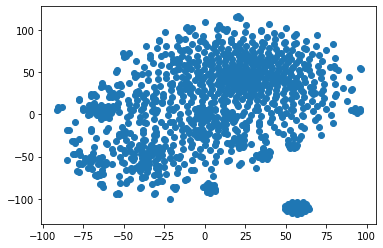

In [99]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

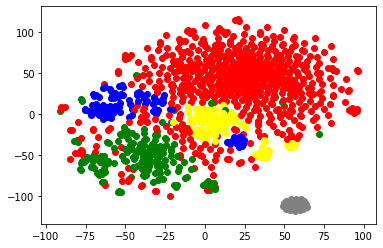

In [101]:
color = ['red', 'blue', 'green', 'gray', 'yellow']

for i, label in enumerate(kmeans.labels_):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=color[label])

In [ ]:
red_articles_id = [i for i, label in enumerate(kmeans.labels_) if label == 0]
blue_articles_id = [i for i, label in enumerate(kmeans.labels_) if label == 1]

In [105]:
for _id in red_articles_id[:10]:
    print(sample_sentences[_id])

['新华社', '照片', '外代', '2017', '年', '4', '月', '15', '日', 'n', '外代', '二线', '摩洛哥', '沙漠', '超级', '马拉松赛', '第', '5', '赛段', 'n4', '月', '14', '日', '参赛选手', '完成', '摩洛哥', '沙漠', '马拉松', '第', '5', '赛段', '比赛', '后', '庆祝', 'n14', '日', '第', '32', '届', '摩洛哥', '沙漠', '超级', '马拉松赛', '进入', '第', '5', '赛段', '比赛', '本届', '摩洛哥', '沙漠', '超级', '马拉松赛', '全程', '250', '千米', '选手', '将', '在', '摩洛哥', '南部', '撒哈拉沙漠', '徒步', '行进', '在', '极限', '环境', '下', '挑战', '自我', 'n', '新华社', '法新']
['新华社', '华盛顿', '３', '月', '３', '０', '日电', '记者', '林', '小春', '美国', '太空', '探索', '技术', '公司', '３', '０', '日', '利用', '翻新', '的', '二手', '火箭', '把', '一颗', '商业', '通信卫星', '发射', '上天', '这是', '人类', '太空', '史上', '的', '第一次', '火箭', '第一级', '在', '完成', '任务', '后', '还', '再次', '成功', '软着陆', '在', '大西洋', '中', '的', '一艘', '船上', '距', '火箭', '重复使用', '的', '最终目标', '再', '迈', '一大步', 'n', '当天', '的', '发射', '在', '美国', '佛罗里达州', '肯尼迪航天中心', '进行', '美国', '太空', '探索', '技术', '公司', '提前', '２', '０', '分钟', '开始', '视频', '直播', '一切', '都', '很', '顺利', '美国', '东部', '时间', '３', '０', '日', '１', '８', '时', '２', '７', '分',

In [106]:
for _id in blue_articles_id:
    print(''.join(sample_sentences[_id]))

新华社照片常州江苏2017年4月19日n体育3羽毛球大师赛周昊东徐涯晋级混双16强n4月19日中国选手周昊东徐涯右在比赛中回球n当日在江苏常州进行的2017中国羽毛球大师赛混双首轮比赛中中国选手周昊东徐涯以2比1战胜中国台北选手苏敬恒叶瀞雅晋级16强n新华社记者季春鹏摄
新华社照片黄金海岸澳大利亚2017年5月24日n体育10羽毛球苏迪曼杯日本胜马来西亚n5月24日马来西亚选手吴堇溦在女单比赛中她以0比2不敌日本选手山口茜n当日在澳大利亚黄金海岸举行的2017年苏迪曼杯世界羽毛球混合团体锦标赛小组赛中日本队以3比2战胜马来西亚队n新华社记者吕小炜摄
新华社照片无锡江苏2017年4月15日n体育5乒乓球亚锦赛许昕无缘男单四强n4月15日许昕在比赛中回球n当日在江苏省无锡市举行的第23届亚洲乒乓球锦标赛男单四分之一决赛中中国选手许昕以1比3不敌日本选手丹羽孝希无缘四强n新华社记者李响摄
新华社照片青岛山东2017年4月17日n体育2游泳全国冠军赛浙江队选手徐嘉余获得男子50米仰泳冠军n4月17日浙江队选手徐嘉余在比赛中n当日在山东青岛举行的2017年全国游泳冠军赛暨第十三届全运会预选赛中浙江队选手徐嘉余以24秒48的成绩获得男子50米仰泳冠军n新华社记者朱峥摄
新华社照片无锡江苏2017年4月14日n体育1乒乓球亚锦赛武杨晋级八强n4月14日中国选手武杨在比赛中n当日在江苏省无锡市举行的第23届亚洲乒乓球锦标赛女子单打八分之一决赛中武杨以3比2战胜日本选手伊藤美诚晋级八强n新华社记者杨磊摄
新华社照片常州江苏2017年4月23日n体育10羽毛球大师赛大堀彩女单夺冠n4月23日日本选手大堀彩庆祝夺冠n当日在江苏常州举行的2017中国羽毛球大师赛女单决赛中日本选手大堀彩以2比1战胜队友川上纱惠奈获得冠军n新华社记者季春鹏摄n
新华社照片青岛山东2017年4月16日n体育1游泳全国冠军赛辽宁队获得男女混合4x100米自由泳接力冠军n4月16日冠军辽宁队选手中亚军北京队选手左和季军上海队选手在颁奖仪式上合影n当日在山东青岛举行的2017年全国游泳冠军赛暨第十三届全运会预选赛中辽宁队以3分29秒09的成绩获得男女混合4x100米自由泳冠军n新华社记者朱峥摄
新华社照片杜塞尔多夫德国2017年5月31日n体育1乒乓球世乒赛朱雨玲首轮晋级n5月31日朱雨玲在比赛中发球n当日在德国杜塞